# Lab | Data Aggregation and Filtering

Objective: Use Python programming techniques to filter and order data subsets, group data by one or more variables, and use aggregation functions to obtain insights, and derive meaningful conclusions from the data.

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by performing first data cleaning, formatting, and structuring.

Start by reading the dataset, standardizing column names, dealing with null values and creating the month column. You can do so by using the functions you developed in previous labs, or by reading the clean dataset you saved in the last lab `data structuring and combining`.

Then, answer the following questions:

1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

2. Analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign.

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

4. Find the median customer lifetime value by education level and gender.

5. Find the maximum, minimum, and average number of open complaints by state and policy type.

6. The marketing team wants to analyze the number of policies sold by state and month.

Present the data in a table where the months are arranged as columns and the states are arranged as rows.

7. Display a new DataFrame that contains the number of policies sold by month by state for the top 3 states with the highest number of policies sold.

*Hint:* 
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

8. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [1]:
import pandas as pd


data = "marketing_customer_analysis.csv"
df = pd.read_csv(data)
df.columns = df.columns.str.lower().str.replace(" ", "_")

df.head()


,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [6]:
df.columns

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type', 'month'],
      dtype='object')

In [7]:
df.dropna(subset=["total_claim_amount"], inplace=True)
df["month"] = pd.to_datetime(df["effective_to_date"]).dt.month

In [8]:
filtered_df = df[(df["total_claim_amount"] > 1000) & (df["response"] == "Yes")]

In [14]:
average_claim_amount = filtered_df.groupby(["policy_type", "gender"])["total_claim_amount"].mean()
print(average_claim_amount)

policy_type     gender
Corporate Auto  F         1138.400000
                M         1171.150007
Personal Auto   F         1214.853805
                M         1137.861443
Special Auto    F         1358.400000
                M         1017.500015
Name: total_claim_amount, dtype: float64


In [13]:
customer_count_by_state = df.groupby("state").size()
states_over_500_customers = customer_count_by_state[customer_count_by_state > 500]
print(states_over_500_customers)

state
Arizona       1937
California    3552
Nevada         993
Oregon        2909
Washington     888
dtype: int64


In [12]:
median_clv = df.groupby(["education", "gender"])["customer_lifetime_value"].median()
print(median_clv)

education             gender
Bachelor              F         5640.505303
                      M         5548.031892
College               F         5623.611187
                      M         6005.847375
Doctor                F         5332.462694
                      M         5577.669457
High School or Below  F         6039.553187
                      M         6286.731006
Master                F         5729.855012
                      M         5579.099207
Name: customer_lifetime_value, dtype: float64


In [15]:
complaints_stats = df.groupby(["state", "policy_type"])["number_of_open_complaints"].agg(["max", "min", "mean"])
print(complaints_stats)

                           max  min      mean
state      policy_type                       
Arizona    Corporate Auto  5.0  0.0  0.360795
           Personal Auto   5.0  0.0  0.391021
           Special Auto    3.0  0.0  0.246914
California Corporate Auto  4.0  0.0  0.307006
           Personal Auto   5.0  0.0  0.401555
           Special Auto    5.0  0.0  0.449153
Nevada     Corporate Auto  5.0  0.0  0.463768
           Personal Auto   5.0  0.0  0.406026
           Special Auto    5.0  0.0  0.600000
Oregon     Corporate Auto  4.0  0.0  0.339823
           Personal Auto   5.0  0.0  0.371234
           Special Auto    5.0  0.0  0.374046
Washington Corporate Auto  5.0  0.0  0.512048
           Personal Auto   5.0  0.0  0.382445
           Special Auto    4.0  0.0  0.645161


In [16]:
policies_sold_by_state_month = df.groupby(["state", "month"]).size().unstack().fillna(0)
print(policies_sold_by_state_month)

month          1     2
state                 
Arizona     1008   929
California  1918  1634
Nevada       551   442
Oregon      1565  1344
Washington   463   425


In [18]:
top_3_states = customer_count_by_state.nlargest(3).index
top_3_policies_sold = policies_sold_by_state_month.loc[top_3_states]
print(top_3_policies_sold)

month          1     2
state                 
California  1918  1634
Oregon      1565  1344
Arizona     1008   929


In [19]:
response_rate_by_channel = pd.melt(df, id_vars=["response"], value_vars=["sales_channel"], value_name="marketing_channel")
response_rate_by_channel = response_rate_by_channel.groupby(["marketing_channel", "response"]).size().unstack()
response_rate_by_channel["Response Rate"] = response_rate_by_channel["Yes"] / response_rate_by_channel.sum(axis=1)
print(response_rate_by_channel)

response             No  Yes  Response Rate
marketing_channel                          
Agent              3148  742       0.190746
Branch             2539  326       0.113787
Call Center        1792  221       0.109786
Web                1334  177       0.117141


In [2]:
# Lab: Customer Analysis Round 3

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = "marketing_customer_analysis.csv"
df = pd.read_csv(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

In [7]:
df.describe()

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


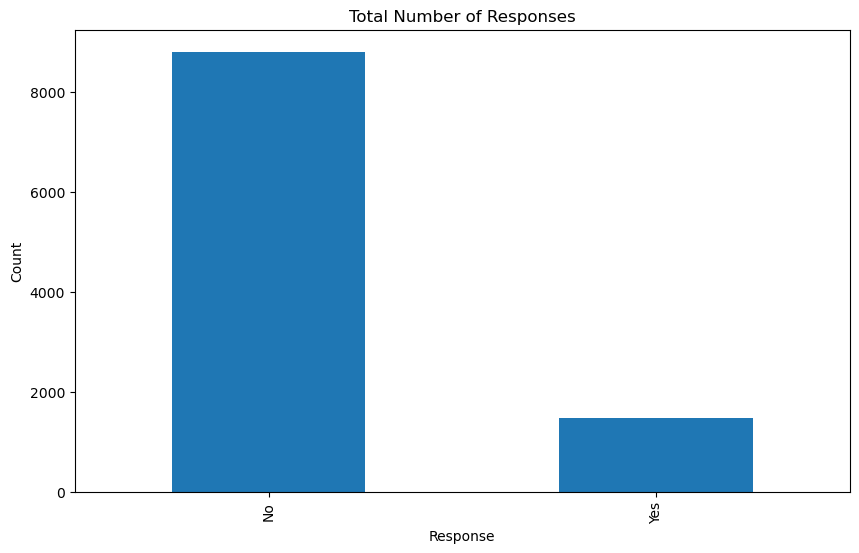

In [8]:
plt.figure(figsize=(10, 6))
df['Response'].value_counts().plot(kind='bar')
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Total Number of Responses')
plt.show()

In [12]:
print(df['Response'].dtype)


object


In [14]:
df['Response'] = pd.to_numeric(df['Response'], errors='coerce')


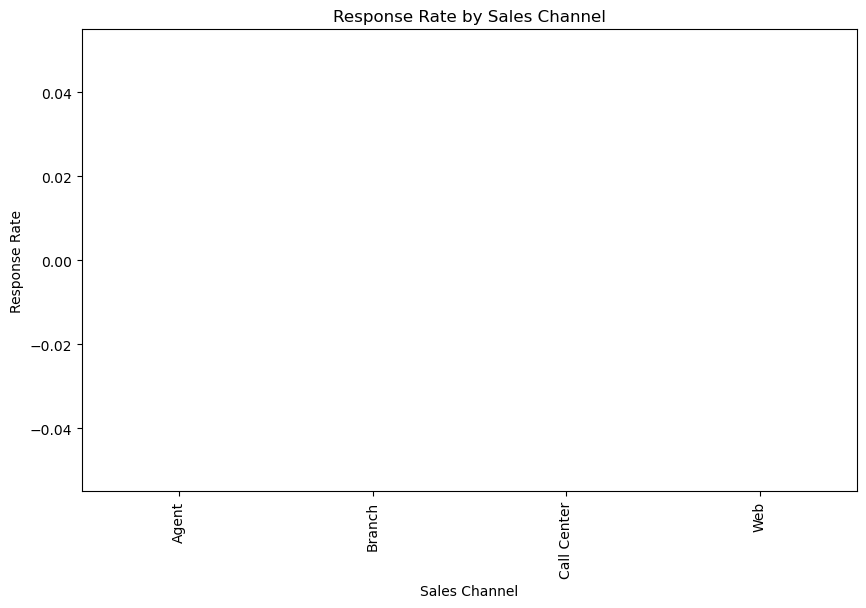

In [15]:
plt.figure(figsize=(10, 6))
df['Response'] = pd.to_numeric(df['Response'], errors='coerce')
df.groupby('Sales Channel')['Response'].mean().plot(kind='bar')
plt.xlabel('Sales Channel')
plt.ylabel('Response Rate')
plt.title('Response Rate by Sales Channel')
plt.show()


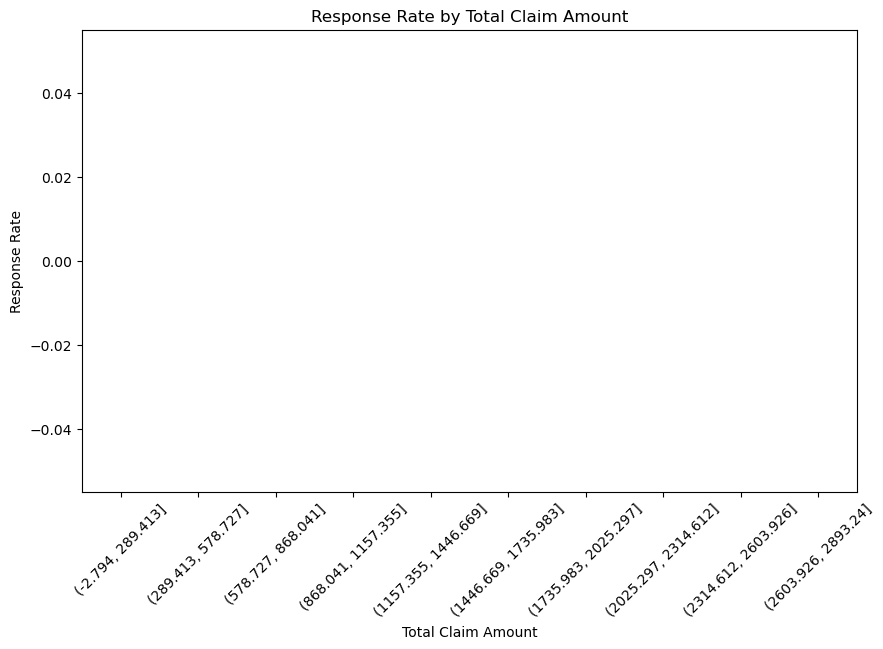

In [16]:
df['Response'] = pd.to_numeric(df['Response'])  

plt.figure(figsize=(10, 6))
df['Total Claim Amount_bin'] = pd.cut(df['Total Claim Amount'], bins=10)
df.groupby('Total Claim Amount_bin')['Response'].mean().plot(kind='bar')
plt.xlabel('Total Claim Amount')
plt.ylabel('Response Rate')
plt.title('Response Rate by Total Claim Amount')
plt.xticks(rotation=45)
plt.show()

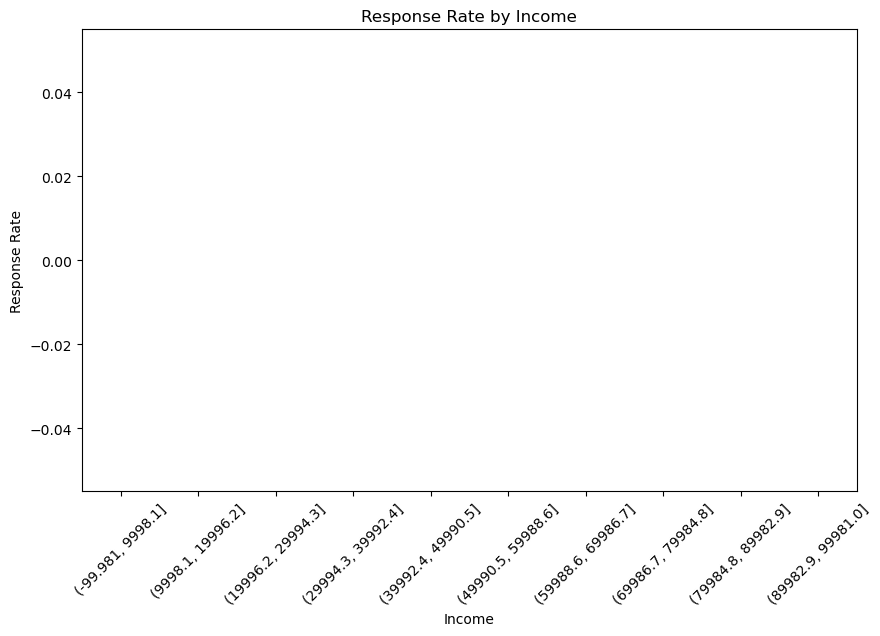

In [17]:
plt.figure(figsize=(10, 6))
df['Income_bin'] = pd.cut(df['Income'], bins=10)
df['Response'] = pd.to_numeric(df['Response'])  
df.groupby('Income_bin')['Response'].mean().plot(kind='bar')
plt.xlabel('Income')
plt.ylabel('Response Rate')
plt.title('Response Rate by Income')
plt.xticks(rotation=45)
plt.show()
